
Table 1. Descriptive statistics by resource access

                     count  mean   std  min  25%  50%  75%   max
workplace_resources                                             
0.0                  356.0  6.54  2.72  0.0  5.0  7.0  9.0  10.0
1.0                  288.0  6.93  2.52  0.0  5.0  7.0  9.0  10.0


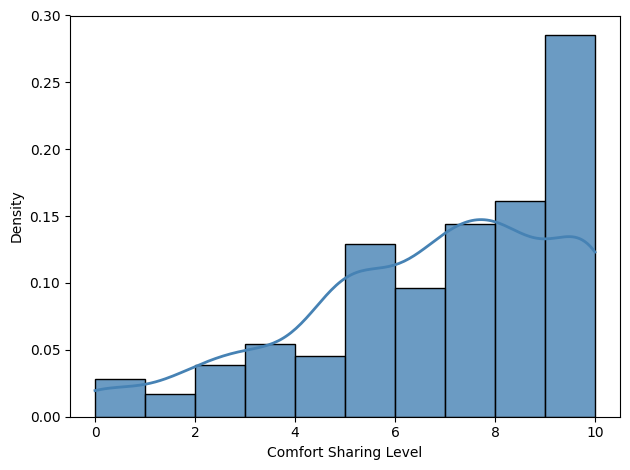

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import patsy as pt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import chi2_contingency

# ------------------------------------
# Data Cleanup and processing
# ------------------------------------
# Load data
data = pd.read_csv("data.csv")

df = data[data['tech_company'].str.strip().str.title() == 'Yes'].copy()

# Rename columns if needed
df.columns = df.columns.str.strip().str.lower()
name_map = {
    # "comfort sharing level": "mh_share",
    # "access to mental health resources": "workplace_resources"
}
df = df.rename(columns=name_map)

# Clean and encode access variable
if df['workplace_resources'].dtype == 'O':
    df['workplace_resources'] = df['workplace_resources'].str.strip().str.title().map({'Yes':1, 'No':0})

# Drop missing values
df = df[['mh_share', 'workplace_resources']].dropna()

# ------------------------------------
# Exploratory Data Analysis
# ------------------------------------

# ------------------------------------
# Table 1: Descriptive statistics
# ------------------------------------
table1 = df.groupby('workplace_resources')['mh_share'].describe().round(2)
print("\nTable 1. Descriptive statistics by resource access\n")
print(table1)

# ------------------------------------
# Figure 1: Distribution of comfort sharing
# ------------------------------------
#plt.figure(figsize=(7,5))
#plt.hist(df['mh_share'], bins=10, density=True, alpha=0.7)
sns.histplot(df['mh_share'], bins=10, stat='density', kde=True, color="steelblue", line_kws={'color' : 'black', 'lw' : 2}, alpha=0.8)
#plt.title("Figure 1. Distribution of Comfort Sharing Levels")
plt.xlabel("Comfort Sharing Level")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

/var/folders/m0/887hx1j52xb933b50hqtkv3r0000gn/T/ipykernel_77833/1576113847.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='workplace_resources', data=df, palette="colorblind")


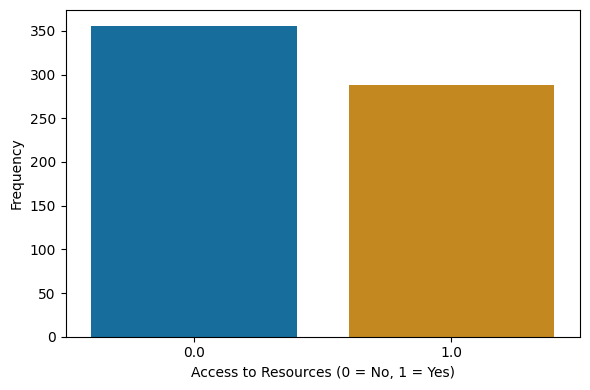

In [8]:
# ------------------------------------
# Figure 2: Resource access counts
# ------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='workplace_resources', data=df, palette="colorblind")
#plt.title("Figure 2. Access to Mental Health Resources")
plt.xlabel("Access to Resources (0 = No, 1 = Yes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

/var/folders/m0/887hx1j52xb933b50hqtkv3r0000gn/T/ipykernel_77833/1131661503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workplace_resources', y='mh_share', data=df, palette="colorblind")


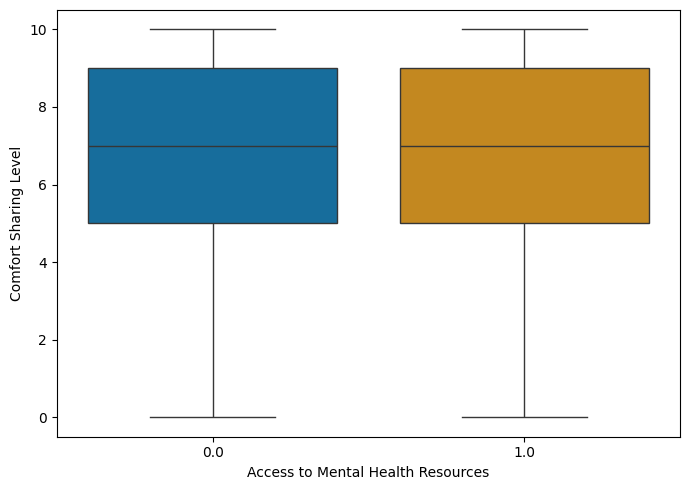

In [ ]:
# ------------------------------------
# Figure 3: Boxplot by resource access
# ------------------------------------
plt.figure(figsize=(7,5))
sns.boxplot(x='workplace_resources', y='mh_share', data=df, palette="colorblind")
#plt.title("Figure 3. Comfort Sharing by Access to Resources (Boxplot)")
plt.xlabel("Access to Mental Health Resources")
plt.ylabel("Comfort Sharing Level")
plt.tight_layout()
plt.show()

/var/folders/m0/887hx1j52xb933b50hqtkv3r0000gn/T/ipykernel_77833/2576200051.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workplace_resources', y='mh_share', data=mean_values, palette="colorblind")


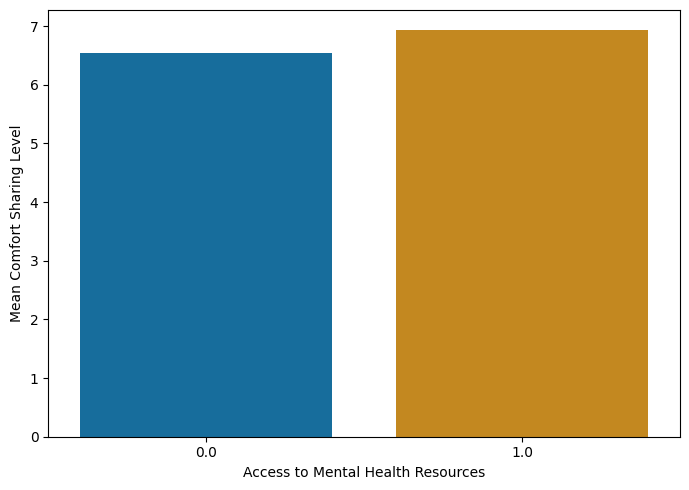

In [10]:
# ------------------------------------
# Figure 4: Mean comparison bar plot
# ------------------------------------
plt.figure(figsize=(7,5))
mean_values = df.groupby('workplace_resources')['mh_share'].mean().reset_index()
sns.barplot(x='workplace_resources', y='mh_share', data=mean_values, palette="colorblind")
#plt.title("Figure 4. Mean Comfort Sharing by Resource Access")
plt.xlabel("Access to Mental Health Resources")
plt.ylabel("Mean Comfort Sharing Level")
plt.tight_layout()
plt.show()

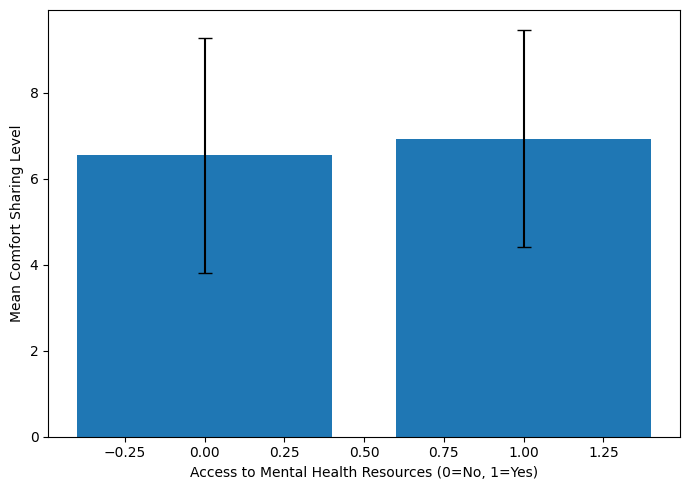

In [11]:
# ------------------------------------
# Figure 5: Group means with error bars (SD)
# ------------------------------------
plt.figure(figsize=(7,5))
summary = df.groupby('workplace_resources')['mh_share'].agg(['mean','std']).reset_index()
plt.bar(summary['workplace_resources'], summary['mean'], yerr=summary['std'], capsize=5)
#plt.title("Figure 5. Comfort Sharing Means with Standard Deviation")
plt.xlabel("Access to Mental Health Resources (0=No, 1=Yes)")
plt.ylabel("Mean Comfort Sharing Level")
plt.tight_layout()
plt.show()